In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os

In [2]:
# Navigate to where the data is . . . 
# on my laptop, the tardi_gait directory is here: 
#/Users/iwoods/OneDrive - Ithaca College/tardi_gait

# get a list of experiments
tardi_gait = os.path.join(os.sep, 'Users','iwoods','ic_onedrive', 'tardi_gait')
os.chdir(tardi_gait)
dir_list = listDirectories()
for d in dir_list:
    print(d)

In [3]:
exp = 'noTreatment_noTreatment_July2022'
exp_dir = os.path.join(tardi_gait, exp)

# Get a list of available experiments in this directory
print('looking in ' + exp_dir )
os.chdir(exp_dir)

dir_list = listDirectories()
for d in dir_list:
    print(d)

looking in /Users/iwoods/ic_onedrive/tardi_gait/noTreatment_noTreatment_July2022
control
no_treatment


In [4]:
# select an experiment to analyze
treatment_dir = 'no_treatment'

# LOOK IN MULTIPLE FOLDERS AND COMBINE DATA
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py
step_data = experimentToDf(treatment_dir,fname)
step_data.head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a024-031
2: 1a034-041
3: 1a083-089
4: 1a091-097
5: 2a054-058
6: 2a063-073
7: 2a074-079
8: 2a098-103
9: 2a107-112
10: 2a122-125
11: 3a004-010
12: 3a040-044
13: 3a058-064
14: 3a066-074
15: 3a076-082
16: 3a084-090
17: 3a092-099
18: 3a105-112
19: select ALL

Which number(s) do you want? 11,12,13,14,15,16,17,18
You chose: 3a004-010 and 3a040-044 and 3a058-064 and 3a066-074 and 3a076-082 and 3a084-090 and 3a092-099 and 3a105-112
Found 3a004-010/all_step_data_swings.csv
Found 3a040-044/all_step_data_swings.csv
Found 3a058-064/all_step_data_swings.csv
Found 3a066-074/all_step_data_swings.csv
Found 3a076-082/all_step_data_swings.csv
Found 3a084-090/all_step_data_swings.csv
Found 3a092-099/all_step_data_swings.csv
Found 3a105-112/all_step_data_swings.csv


,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
0,R4,0.781,1.148,0.367,0.333,0.700,0.5243,1.3145,R4:0.7621,R3:0.3814,R2:0.0243,R1:0.8336,L1:0.6907,L2:0.1671,L3:0.5243,L4:0.1671,R3:0.1914,L4:0.9529,3a004-010
1,R4,1.481,2.016,0.535,0.367,0.902,0.5931,2.1995,R4:0.7966,R3:0.3897,R2:0.1297,R1:0.8337,L1:0.4446,L2:0.056;0.908,L3:0.4634,L4:0.1851,R3:0.2594,L4:0.9257,3a004-010
2,R4,2.383,2.750,0.367,0.333,0.700,0.5243,2.9165,R4:0.7621,R3:0.5,R2:0.1664,R1:0.8336,L1:0.3093,L2:0.8807,L3:0.4043,L4:0.1664,R3:0.3329,L4:0.9529,3a004-010


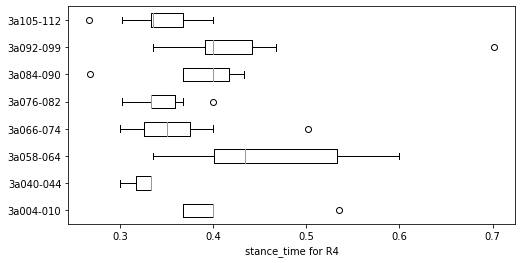

In [5]:
# How consistent is a given parameter between the different clips? ... a bit of quality contro.
parameter = 'stance_time' # stance_time, swing_time, duty_factor, gait_cycle
leg = 'R4'

clips = sorted(list(set(step_data['clip'].values)))

data_to_plot = []
for clip in clips:
#     print(clip)
    data_for_clip = step_data[step_data['clip'] == clip]
    data_for_leg = data_for_clip[data_for_clip['ref_leg']==leg]
    data_for_parameter = data_for_leg[parameter].values
    data_to_plot.append(data_for_parameter)

figheight = 0.5 * len(clips)
f = plt.figure(figsize = (8,figheight))
plt.boxplot(data_to_plot, vert=False)
locs, labels = plt.yticks()
labels = clips
plt.yticks(locs,labels)
plt.xlabel(parameter + ' for ' + leg)
plt.show()

In [6]:
# set up interesting leg groupings
leg_combos = get_leg_combos()
for combo in leg_combos.keys():
    print(combo, leg_combos[combo])

legs_all ['L4', 'L3', 'L2', 'L1', 'R1', 'R2', 'R3', 'R4']
legs_lateral ['L3', 'L2', 'L1', 'R1', 'R2', 'R3']
legs_all_right ['R4', 'R3', 'R2', 'R1']
legs_all_left ['L4', 'L3', 'L2', 'L1']
legs_right ['R3', 'R2', 'R1']
legs_left ['L3', 'L2', 'L1']
legs_1 ['R1', 'L1']
legs_2 ['R2', 'L2']
legs_3 ['R3', 'L3']
legs_4 ['R4', 'L4']


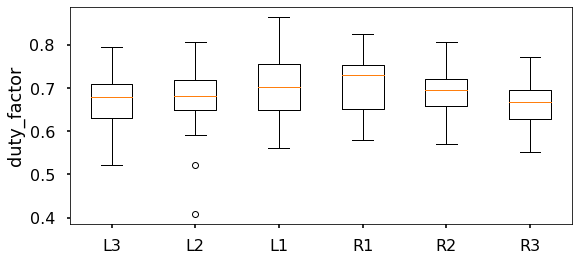

In [7]:
# Compare gait parameters for different legs ... also some quality control!

leg_set = leg_combos['legs_lateral'] # legs_all or another combo above
parameter = 'duty_factor' # stance_time, swing_time, duty_factor, gait_cycle

leg_parameter_data = []
for leg in leg_set:
    data_for_leg = step_data[step_data['ref_leg']==leg][parameter].values
    leg_parameter_data.append(data_for_leg)

plt.style.use('seaborn-poster') #seaborn-whitegrid seaborn-paper seaborn-talk seaborn-poster
fig_widgth = int(np.round(len(leg_set)*1.5))
f = plt.figure(figsize = (fig_widgth,4))
plt.boxplot(leg_parameter_data)
locs, labels = plt.xticks()
labels = leg_set
plt.xticks(locs,labels)
plt.ylabel(parameter)
plt.show()

In [8]:
# get step stats for a group of legs
all_legs = leg_combos['legs_all']
legs = all_legs
leg_data = {}

for leg in legs:
    leg_data[leg]={}
    leg_data[leg]['stances'] = step_data[step_data.ref_leg == leg]['stance_time'].values
    leg_data[leg]['swings'] = step_data[step_data.ref_leg == leg]['swing_time'].values
    leg_data[leg]['gait_cycle'] = step_data[step_data.ref_leg == leg]['gait_cycle'].values

In [9]:
# set up a figure and some axes
def leg_plot(leg_data, legs_in_plot, rec_height = 0.8):
    fig_width = 16
    fig_height = 0.6 * len(legs_in_plot)
    
    y_levels = np.arange(len(legs_in_plot)) + 0.5
    y_levels_for_legs = dict(zip(legs_in_plot,y_levels))

    stance_color, swing_color = stanceSwingColors()
    
    (f, ax) = plt.subplots(1, figsize=(fig_width, fig_height))
    
    ax.set_yticks(y_levels)
    ax.set_yticklabels(legs, fontsize=12)
    plt.xticks(fontsize=12)
    ax.set_xlim([-0.2,2])
    buffer = rec_height/2 + 0.2
    ax.set_ylim([np.min(y_levels)-buffer, np.max(y_levels)+buffer])
    ax.set_ylabel('Legs', fontsize=16)
    ax.set_xlabel('Time (sec)', fontsize=16)
    
    return f, ax, y_levels_for_legs, rec_height, stance_color, swing_color

# plot stance and swing data on a figure
def plot_stance_swing(f, ax, leg, leg_data, start_x, rec_height, stance_color, swing_color):
    
    stances = leg_data[leg]['stances']
    swings = leg_data[leg]['swings']
    
    # add rectangle for stance
    ax.add_patch(Rectangle((start_x, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))

    # add error bar for stance

    # add rectangle for swing
    ax.add_patch(Rectangle((start_x + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), np.mean(swings), rec_height, 
                           edgecolor='k', facecolor=swing_color, lw=1))

    # add error bar for swing

    # add steps on either side of this one
    gait_cycle = np.mean(stances) + np.mean(swings)
    
    # to left
    left_start = start_x - gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    left_start = start_x - 2 * gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    # to right
    right_start = start_x + gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    right_start = start_x + 2 * gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    return f, ax

def get_mid_swing_timing(leg_1,leg_2):  
    # get a list of all mid_swing times for a pair of legs
    other_leg_mid_swing_col = leg_2 + '_mid_swings'
    other_leg_mid_swing_strings = step_data[step_data.ref_leg==leg_1][other_leg_mid_swing_col].values

    other_leg_mid_swing_data = [x.split(':')[1] for x in other_leg_mid_swing_strings]

    mid_swing_timing = []

    for item in other_leg_mid_swing_data:
        if ';' in item:
            stuff = [float(x) for x in item.split(';')]
            mid_swing_timing.extend(stuff)
        elif len(item)>0:
            mid_swing_timing.append(float(item))

    return(mid_swing_timing)

def get_swing_leg_start(step_leg, swing_leg, mid_swing_timing):
    
    # get list of mid_swing times between two legs
    mid_swing_timing = get_mid_swing_timing(step_leg, swing_leg)
    
    # find the average of the mid_swing times
    mid_swing_time = np.mean(mid_swing_timing)
    
    # find start_x for this leg:
    # mid_swing_timing is expressed as % of gait_cycle of the reference leg (step_leg in this case!)  
    # so we need to get the gait_cycle of the step_leg
    step_leg_gait_cycle = np.mean(leg_data[step_leg]['gait_cycle'])
    
    # convert the mid_swing time from a gait cycle fraction to real seconds
    mid_swing_secs = mid_swing_time * step_leg_gait_cycle
    
    # from this mid swing time, find start of gait cycle for other leg (step down!)
    # it will be mid_swing - half of swing - stance
    swing_leg_stance = np.mean(leg_data[swing_leg]['stances'])
    swing_leg_swing = np.mean(leg_data[swing_leg]['swings'])
    
    start_gait_leg =  mid_swing_secs - swing_leg_swing / 2 - swing_leg_stance
    return start_gait_leg




start leg:  R3
opposite leg:  L3
other_lateral_legs ['R2', 'R1']
other_opposite_legs ['L2', 'L1']


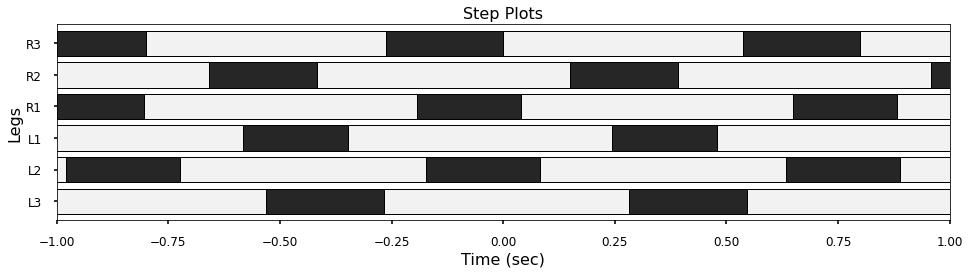

In [10]:
start_leg = 'R3'

# which legs should we plot?
lateral_legs = leg_combos['legs_lateral']
right_lateral = leg_combos['legs_right']
left_lateral = leg_combos['legs_left']
legs = lateral_legs # lateral_legs or right_lateral or left_lateral

opposite_dict, anterior_dict = getOppAndAntLeg()
posterior_dict = getPosteriorLeg()
opposite_leg = opposite_dict[start_leg]

print('start leg: ', start_leg)
print('opposite leg: ', opposite_leg)

start_leg_stance = np.mean(leg_data[start_leg]['stances'])
start_leg_swing = np.mean(leg_data[start_leg]['swings'])
start_leg_gait_cycle = start_leg_stance + start_leg_swing

# set up a figure
f, ax, y_levels_for_legs, rec_height, stance_color, swing_color = leg_plot(leg_data,legs)

# make a plot for starting leg ... this looks good.
start_gait = 0
f, ax = plot_stance_swing(f, ax, start_leg, leg_data, start_gait, rec_height, stance_color, swing_color)

# get ipsilateral and contralateral legs for starting leg
if start_leg in lateral_legs:
    if 'R' in start_leg:
        other_lateral_legs = right_lateral.copy()
        other_opposite_legs = left_lateral.copy()
    else:
        other_lateral_legs = left_lateral.copy()
        other_opposite_legs = right_lateral.copy()
other_lateral_legs.remove(start_leg)
other_opposite_legs.remove(opposite_leg)
print('other_lateral_legs', other_lateral_legs)
print('other_opposite_legs', other_opposite_legs)

# add other ipsilateral legs to plot ... get their timing from the leg posterior to each leg
start_step = 0
for leg in other_lateral_legs:
    posterior_leg = posterior_dict[leg]
    mid_swing_timing = get_mid_swing_timing(posterior_leg, leg)
    start_gait_leg = get_swing_leg_start(posterior_leg, leg, mid_swing_timing)  
    start_step += start_gait_leg
    f, ax = plot_stance_swing(f, ax, leg, leg_data, start_step, 
                              rec_height, stance_color, swing_color)

# add opposite leg to plot ... this is good
mid_swing_timing = get_mid_swing_timing(start_leg, opposite_leg)
start_step_opposite_leg = get_swing_leg_start(start_leg, opposite_leg, mid_swing_timing)
f, ax = plot_stance_swing(f, ax, opposite_leg, leg_data, start_step_opposite_leg, 
                          rec_height, stance_color, swing_color)

# add other contralateral legs to plot ... ... get their timing from the leg posterior to each leg
for leg in other_opposite_legs:
    posterior_leg = posterior_dict[leg]
    mid_swing_timing = get_mid_swing_timing(posterior_leg, leg)
    start_gait_leg = get_swing_leg_start(posterior_leg, leg, mid_swing_timing)
    start_step_opposite_leg += start_gait_leg
    f, ax = plot_stance_swing(f, ax, leg, leg_data, start_step_opposite_leg, 
                              rec_height, stance_color, swing_color)

# right_lim = 1. * start_leg_gait_cycle
# left_lim = -1.4 * start_leg_gait_cycle
# ax.set_xlim(left_lim,right_lim)

ax.set_xlim(-1, 1)
plt.title('Step Plots', fontsize=16)
# plt.title(experiment_dir.replace('_',' '), fontsize=16)
plt.savefig('step_plot.png',dpi=150)
plt.show()